In [1]:
import os
import zipfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
# Importing csv file
df = pd.read_csv('../../use_case_slave_trade/use_case/Slave_trade_data_export.csv',sep=',', header=0, index_col="Voyage ID", decimal=".", parse_dates=[33], date_format="MM,DD,YYYY")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [3]:
df.head()

,Year of arrival at port of disembarkation,Vessel name,Vessel owner,Year registered,Voyage ship place where vessel registered,Flag of vessel,Standardized tonnage,Guns mounted,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),...,"Voyage dates on which slave completed (datarr44,43,45)",Captain's name,Crew at voyage outset,Crew at first landing of captives,Crew deaths during voyage,particular outcome label,slaves outcome label,vessel captured outcome label,owner outcome label,resistance label
Voyage ID,,,,,,,,,,,,,,,,,,,,,
32499,1751.0,Prince Henry,Begouen Demeaux,NaN,NaN,France,272.3,NaN,Le Havre,"West Central Africa and St. Helena, port unspe...",...,"02,17,1752","Renault, Jacques-Joseph-Fr",30.0,NaN,4.0,Voyage completed as intended,Slaves disembarked in Americas,Not captured,Delivered slaves for original owners,NaN
32500,1751.0,Prince Noir,"Feray (Vve)<br/> Feray, Daniel",NaN,NaN,France,305.3,NaN,Le Havre,"Gold Coast, Fr. definition",...,"04,24,1752","Mouchel, J-Fr",22.0,NaN,1.0,Voyage completed as intended,Slaves disembarked in Americas,Not captured,Delivered slaves for original owners,NaN
32501,1752.0,Prince Glace,"La Haye, de",NaN,NaN,France,47.3,NaN,Le Havre,"Africa, port unspecified",...,NaN,"Vieillard, Grégoire",NaN,NaN,NaN,Sold in the Americas after disembarking slaves,Slaves disembarked in Americas,Not captured,Delivered slaves for original owners,NaN
32502,1752.0,Prince d'Afrique,"Chauvel, David",NaN,NaN,France,218.3,NaN,Le Havre,Anomabu,...,"06,15,1753","Donat, Thomas",26.0,NaN,8.0,Voyage completed as intended,Slaves disembarked in Americas,Not captured,Delivered slaves for original owners,NaN
32503,1753.0,Diane,Foache,NaN,NaN,France,269.3,NaN,Le Havre,Loango,...,"09,23,1753","Auvray, Luc-David",41.0,NaN,18.0,Voyage completed as intended,Slaves disembarked in Americas,Not captured,Delivered slaves for original owners,NaN


In [5]:
df.columns


Index(['Year of arrival at port of disembarkation', 'Vessel name',
       'Vessel owner', 'Year registered',
       'Voyage ship place where vessel registered ', 'Flag of vessel',
       'Standardized tonnage', 'Guns mounted',
       'Voyage itinerary imputed port where began (ptdepimp) place',
       'Voyage itinerary imputed principal place of slave purchase (mjbyptimp) ',
       'Voyage itinerary port of call before atlantic crossing (npafttra) place',
       'Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place',
       'Voyage itinerary place at which ended (portret) ', 'Total embarked',
       'Total embarked.1', 'Total disembarked', 'Percent men', 'Percent women',
       'Percent boys', 'Percent girls', 'Percent males', 'Percent children',
       'Sterling cash price in Jamaica', 'Captive deaths during crossing',
       'Percentage of captives who died during crossing',
       'Duration of captives' crossing (in days)',
       'Voyage duration, homep

In [10]:
col = 0
for i in df.columns:
    print(col, " ", i)
    col+=1

0   Year of arrival at port of disembarkation
1   Vessel name
2   Vessel owner
3   Year registered
4   Voyage ship place where vessel registered 
5   Flag of vessel
6   Standardized tonnage
7   Guns mounted
8   Voyage itinerary imputed port where began (ptdepimp) place
9   Voyage itinerary imputed principal place of slave purchase (mjbyptimp) 
10   Voyage itinerary port of call before atlantic crossing (npafttra) place
11   Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place
12   Voyage itinerary place at which ended (portret) 
13   Total embarked
14   Total embarked.1
15   Total disembarked
16   Percent men
17   Percent women
18   Percent boys
19   Percent girls
20   Percent males
21   Percent children
22   Sterling cash price in Jamaica
23   Captive deaths during crossing
24   Percentage of captives who died during crossing
25   Duration of captives' crossing (in days)
26   Voyage duration, homeport to disembarkation (in days)
27   Voyage dates that bega

In [3]:
#Change , to . in Date-columns
df.iloc[:,27:33] = df.iloc[:,27:33].replace(",",".", regex=True)

In [90]:
df.iloc[:,27:33]

,"Voyage dates that began (depb,a,c)","Voyage dates that slave purchase began (d1slatrb,a,c)",Voyage dates vessel departed africa (leftafr),"Voyage dates of first disembarkation slaves (datarr33,32,34)","Voyage dates of departure from last place landing (ddepamb,*,c)","Voyage dates on which slave completed (datarr44,43,45)"
Voyage ID,,,,,,
32499,11.16.1750,02.20.1751,6.1.1751,08.01.1751,NaN,02.17.1752
32500,01.21.1751,03.09.1751,6.26.1751,09.12.1751,02.19.1752,04.24.1752
32501,..1751,NaN,NaN,01.12.1752,NaN,NaN
32502,10.21.1751,02.20.1752,NaN,09.25.1752,NaN,06.15.1753
32503,11.02.1751,03..1752,NaN,01.03.1753,NaN,09.23.1753
...,...,...,...,...,...,...
900233,NaN,NaN,NaN,NaN,NaN,NaN
900234,NaN,NaN,NaN,NaN,NaN,NaN
900235,12.12.1851,NaN,NaN,NaN,NaN,NaN


In [4]:
#Datums-Spalten in Daten umwandeln
df.iloc[:,27:33] = pd.to_datetime(df.iloc[:,27:33].stack(),errors='coerce').unstack()

In [108]:
df.head()
df.iloc[:,27:33]

,"Voyage dates that began (depb,a,c)","Voyage dates that slave purchase began (d1slatrb,a,c)",Voyage dates vessel departed africa (leftafr),"Voyage dates of first disembarkation slaves (datarr33,32,34)","Voyage dates of departure from last place landing (ddepamb,*,c)","Voyage dates on which slave completed (datarr44,43,45)"
Voyage ID,,,,,,
32499,1750-11-16,1751-02-20,1751-06-01,1751-08-01,NaT,1752-02-17
32500,1751-01-21,1751-03-09,1751-06-26,1751-09-12,1752-02-19,1752-04-24
32501,NaT,NaT,NaT,1752-01-12,NaT,NaT
32502,1751-10-21,1752-02-20,NaT,1752-09-25,NaT,1753-06-15
32503,1751-11-02,NaT,NaT,1753-01-03,NaT,1753-09-23
...,...,...,...,...,...,...
900233,NaT,NaT,NaT,NaT,NaT,NaT
900234,NaT,NaT,NaT,NaT,NaT,NaT
900235,1851-12-12,NaT,NaT,NaT,NaT,NaT


In [16]:
df.index

RangeIndex(start=0, stop=36080, step=1)

<Axes: xlabel='Voyage ID'>

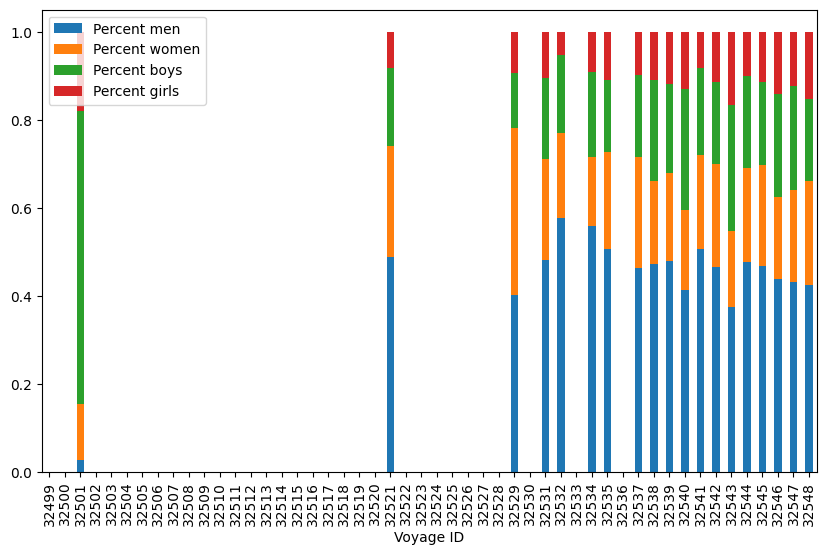

In [35]:
#Ausgabe %-Anteile der Sklav*innen der ersten 100 Schiffe
df.iloc[0:50,16:20].plot(figsize=(10,6), kind="bar", stacked=True)

<Axes: xlabel='Captive deaths during crossing', ylabel='Sterling cash price in Jamaica'>

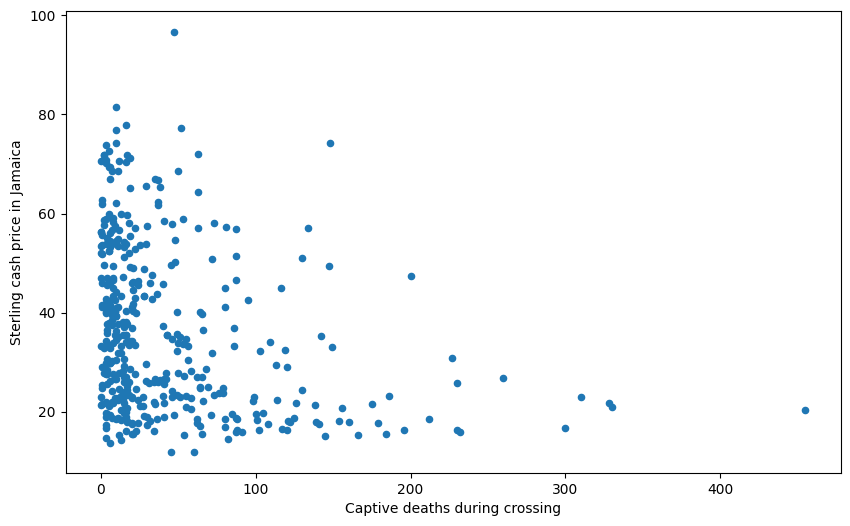

In [25]:
df.iloc[0:50000,[22,23]].plot(figsize=(10,6),x=df.columns[23], y=df.columns[22],kind="scatter")

<Axes: xlabel='Total embarked', ylabel='Percentage of captives who died during crossing'>

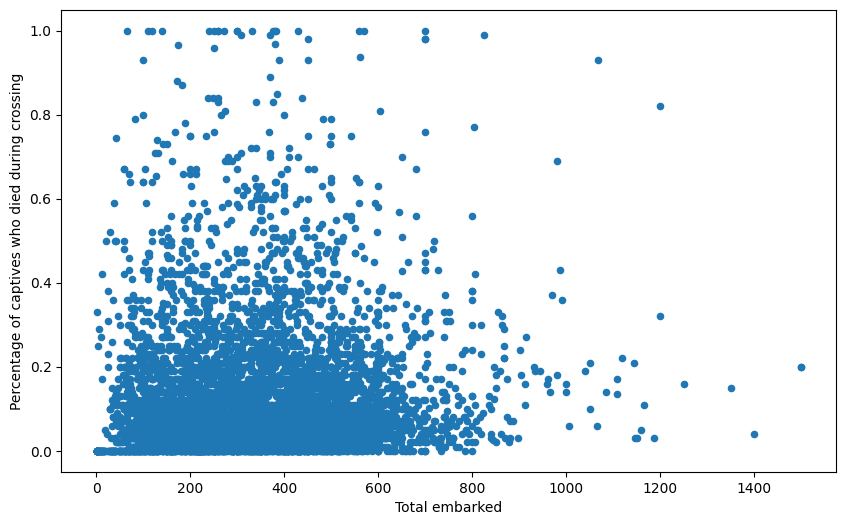

In [28]:
df.iloc[0:50000,[13,24]].plot(figsize=(10,6),x=df.columns[13], y=df.columns[24],kind="scatter")

<Axes: xlabel='Flag of vessel', ylabel='count of voyages'>

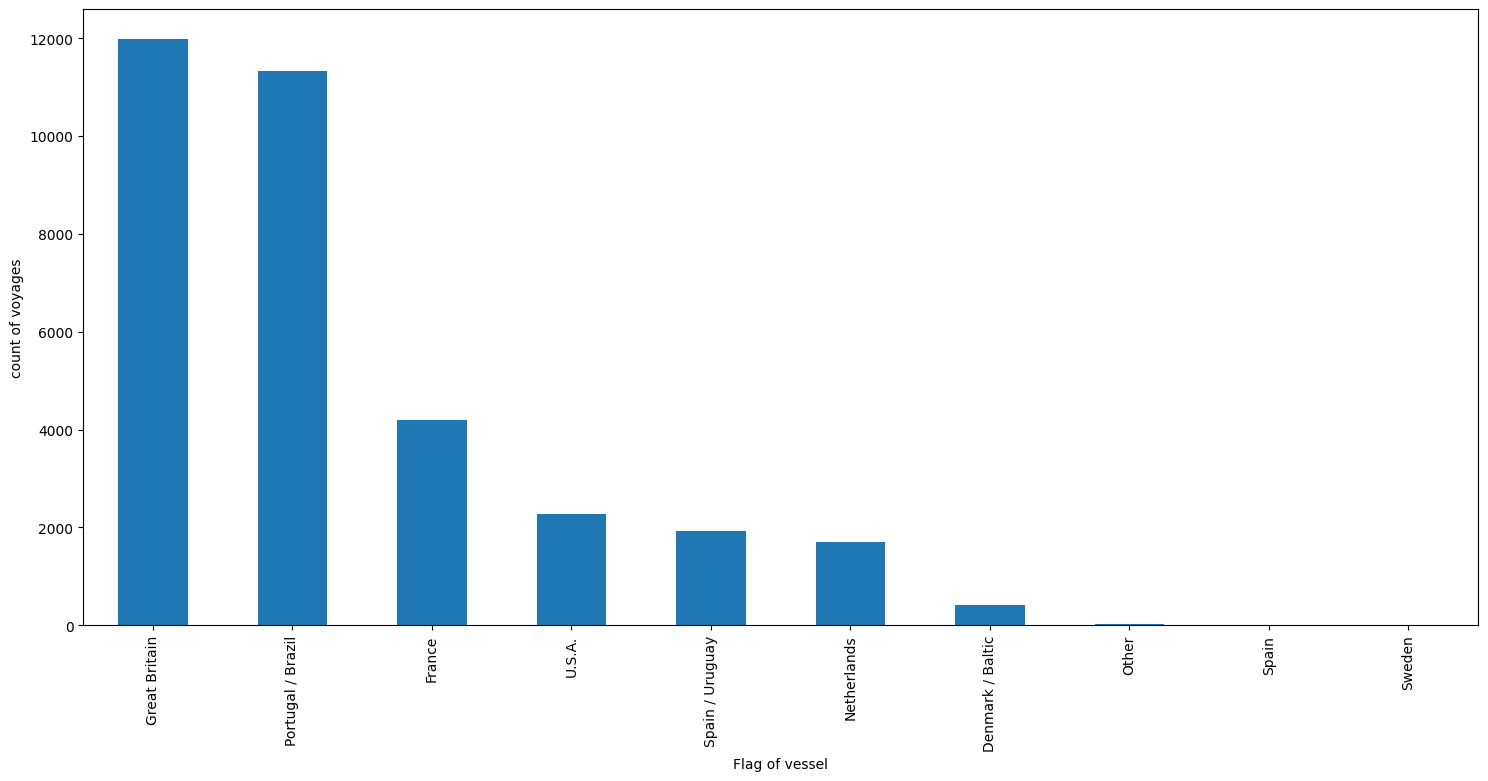

In [47]:
df.iloc[:,5].value_counts(False).plot(kind='bar', figsize=(18,8),ylabel='count of voyages')


In [54]:
df.describe()

,Year of arrival at port of disembarkation,Year registered,Standardized tonnage,Guns mounted,Total embarked,Total embarked.1,Total disembarked,Percent men,Percent women,Percent boys,...,Percent males,Percent children,Sterling cash price in Jamaica,Captive deaths during crossing,Percentage of captives who died during crossing,Duration of captives' crossing (in days),"Voyage duration, homeport to disembarkation (in days)",Crew at voyage outset,Crew at first landing of captives,Crew deaths during voyage
count,36079.000000,5021.000000,16706.000000,6195.000000,34449.000000,8327.000000,34157.000000,3470.000000,3471.000000,3462.000000,...,3942.000000,4208.000000,932.000000,6547.000000,6497.000000,7313.000000,13070.000000,12739.000000,2283.000000,4464.000000
mean,1764.518196,1744.480781,193.855770,8.247619,308.966821,330.412634,268.981966,0.491189,0.263721,0.154514,...,0.645439,0.214893,38.951620,43.210325,0.122484,60.397922,290.454476,30.118063,23.096802,6.881944
std,59.246381,60.196507,98.336352,6.471793,154.882384,180.327178,137.490854,0.146954,0.120432,0.110330,...,0.122071,0.166202,18.265375,64.924711,0.150213,33.081091,132.197738,15.920597,10.565841,6.879338
min,1514.000000,1526.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,11.720000,0.000000,0.000000,2.000000,39.000000,0.000000,0.000000,0.000000
25%,1732.000000,1743.000000,127.000000,4.000000,205.000000,195.000000,176.000000,0.397118,0.183050,0.074575,...,0.571047,0.074530,23.220000,7.000000,0.030000,38.000000,209.000000,20.000000,15.000000,2.000000
50%,1773.000000,1762.000000,182.300000,6.000000,300.000000,320.000000,260.000000,0.489525,0.255590,0.137325,...,0.645365,0.195480,36.190000,21.000000,0.070000,53.000000,269.000000,28.000000,22.000000,5.000000
75%,1806.000000,1776.000000,257.300000,10.000000,390.000000,450.000000,350.000000,0.584735,0.338775,0.214290,...,0.714290,0.318238,49.982500,53.000000,0.160000,73.000000,346.000000,37.000000,30.000000,9.000000
max,1866.000000,1860.000000,1269.200000,80.000000,2024.000000,1500.000000,1700.000000,1.000000,1.000000,0.905410,...,1.000000,1.000000,101.150000,998.000000,1.000000,532.000000,3164.000000,606.000000,90.000000,94.000000


<Axes: >

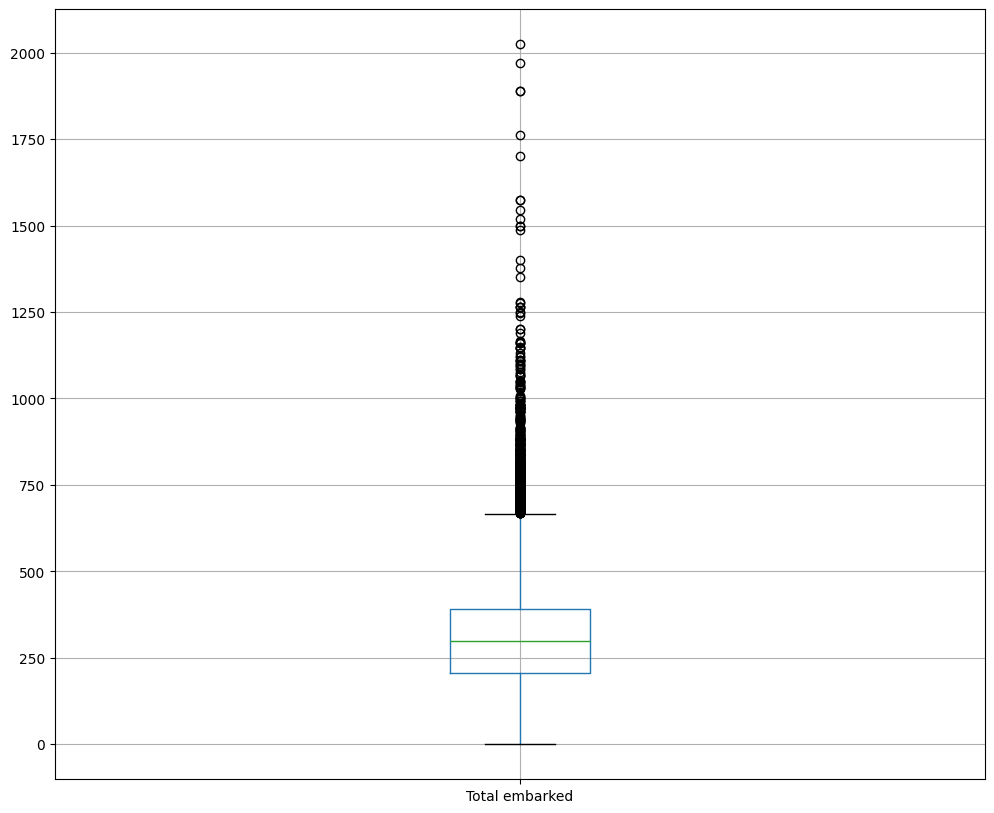

In [74]:
df.boxplot('Total embarked',return_type = 'axes', figsize=(12,10), showfliers=True)

<Axes: >

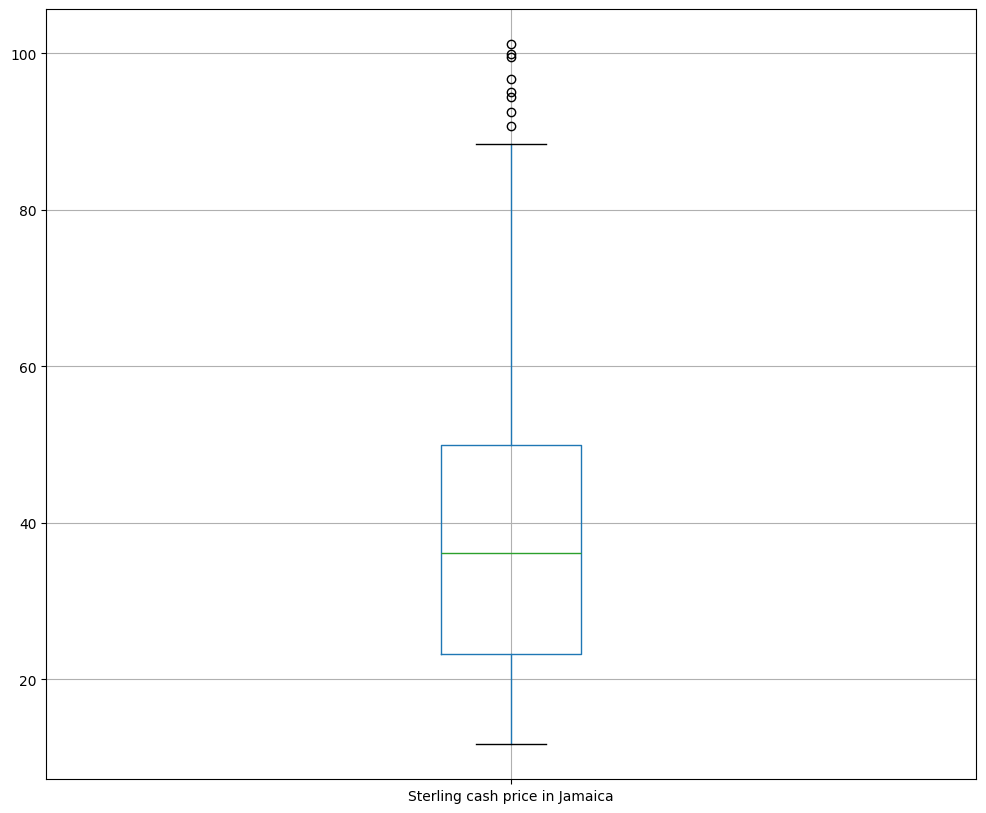

In [75]:
df.boxplot('Sterling cash price in Jamaica',return_type = 'axes', figsize=(12,10), showfliers=True)

<Axes: >

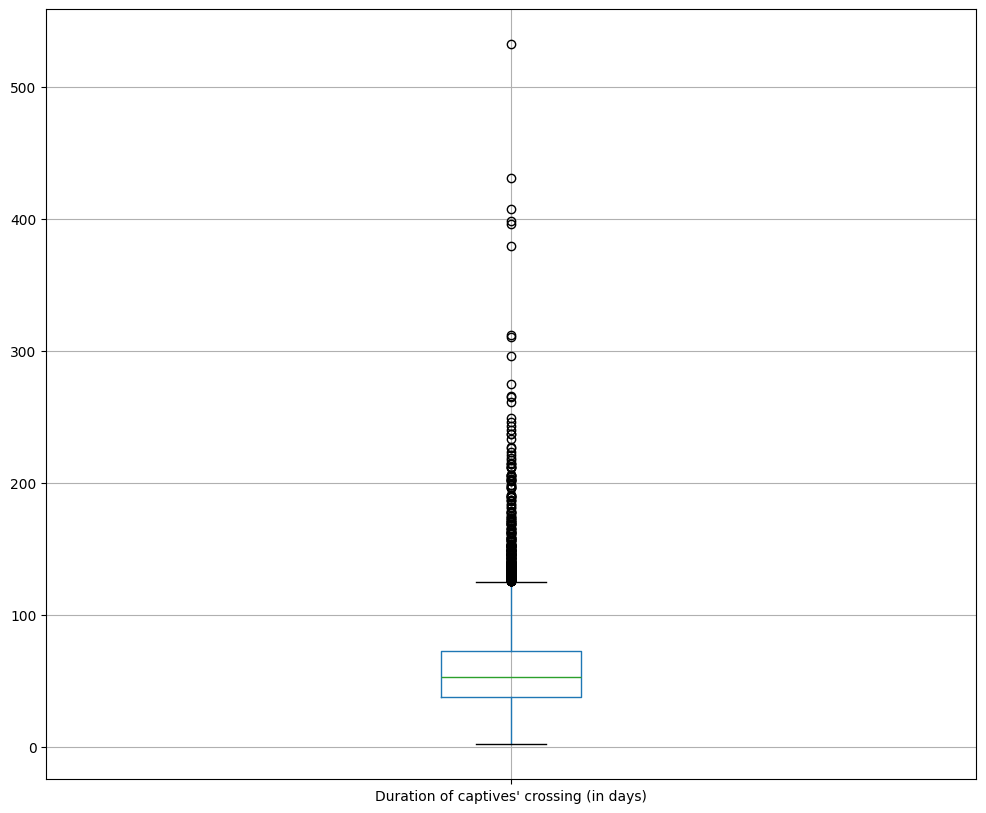

In [86]:
df.boxplot('Duration of captives\' crossing (in days)',return_type = 'axes', figsize=(12,10), showfliers=True)

<Axes: xlabel='Year of arrival at port of disembarkation'>

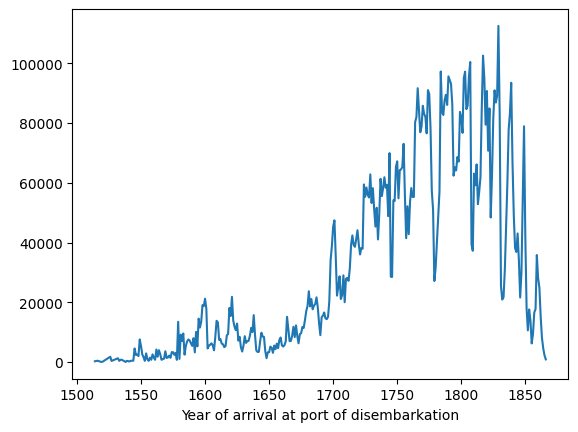

In [34]:
df.groupby(["Year of arrival at port of disembarkation"],sort=True)["Total embarked"].sum().plot(kind="line")